Investigate the given dataset.

## Application Parameters

Note: algorithm tuning is done with declaration of the model.

In [1]:
import pandas as pd
import datetime
from datetime import date

In [2]:
debug = False

DRIVE_PATH = "/content/drive/MyDrive/data606/"

# Set the location of this script in GDrive
SCRIPT_PATH = DRIVE_PATH + "src/"

# Root Path of the data on the cloud drive
DATA_PATH = DRIVE_PATH + "data/"

# Number of samples to work with - will be split  into train/test
SAMPLE_SIZE = 5000

# Ratio of test data to train data - used for split
TEST_RATIO = 0.3

# Device to run on
run_on_device =  'cpu' # 'cuda'

# Start including data from this date
START_DATE =  date.fromisoformat('1950-01-01')
# Stop including data after this date
END_DATE = date.fromisoformat('2022-12-31')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Load

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6)
import yfinance as yf
yf.pdr_override()
import datetime
from datetime import date
import warnings

In [5]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

---

**Initial Data Load**

---

### NOAA Data


In [58]:
df = pd.read_csv(DATA_PATH + 'GlobalTemperatures.csv')

In [59]:
print(df.shape)
df.describe().T

(3192, 9)


,count,mean,std,min,25%,50%,75%,max
LandAverageTemperature,3180.0,8.374731,4.381310,-2.080,4.31200,8.6105,12.54825,19.021
LandAverageTemperatureUncertainty,3180.0,0.938468,1.096440,0.034,0.18675,0.3920,1.41925,7.880
LandMaxTemperature,1992.0,14.350601,4.309579,5.900,10.21200,14.7600,18.45150,21.320
LandMaxTemperatureUncertainty,1992.0,0.479782,0.583203,0.044,0.14200,0.2520,0.53900,4.373
LandMinTemperature,1992.0,2.743595,4.155835,-5.407,-1.33450,2.9495,6.77875,9.715
LandMinTemperatureUncertainty,1992.0,0.431849,0.445838,0.045,0.15500,0.2790,0.45825,3.498
LandAndOceanAverageTemperature,1992.0,15.212566,1.274093,12.475,14.04700,15.2510,16.39625,17.611
LandAndOceanAverageTemperatureUncertainty,1992.0,0.128532,0.073587,0.042,0.06300,0.1220,0.15100,0.457


In [60]:
df.info()
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [61]:
# convert to date
df['date'] = pd.to_datetime(df['dt']).dt.date
df['date'][3191], START_DATE

(datetime.date(2015, 12, 1), datetime.date(1950, 1, 1))

In [62]:
# Truncate by date
df = df[df['date'] >= START_DATE]
df = df[df['date'] <= END_DATE]

In [63]:
df.reset_index(inplace=True)

In [65]:
df['decade'] = [round(dt.year, -1) for dt in df['date']]

<Axes: xlabel='decade', ylabel='LandAverageTemperature'>

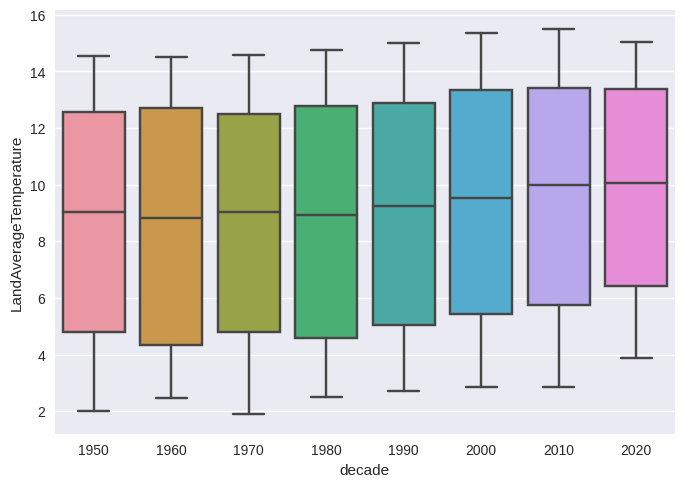

In [66]:
sns.boxplot(data=df, x="decade", y="LandAverageTemperature")

In [64]:
COLS = ['LandAverageTemperature',	'LandMaxTemperature',	'LandMinTemperature',	'LandAndOceanAverageTemperature']

In [ ]:
plt.rcParams["figure.figsize"] = [12,12]
plt.plot(df['n_date'], df[COLS])
plt.xlabel('Date')
plt.ylabel('Temp')
plt.title('Temps')
plt.legend(COLS)
plt.show()

---

---

In [ ]:
df = pd.read_csv(DATA_PATH + 'GlobalLandTemperaturesByCity.csv')

In [ ]:
print(df.shape)
df.describe().T

In [ ]:
df.info()
df.tail(3)

In [ ]:
# convert to date
df['date'] = pd.to_datetime(df['dt']).dt.date
df['date'][3191], START_DATE

In [ ]:
# Truncate by date
df = df[df['date'] >= START_DATE]
df = df[df['date'] <= END_DATE]

In [ ]:
# Unique vals
df['City'].value_counts()

In [ ]:
df['Country'].value_counts()

---

---

In [13]:
df = pd.read_csv(DATA_PATH + 'finalDatasetWithRain.csv')

In [57]:
print(df.shape)
df.describe(include='all')

(604848, 75)


,index,lat,lon,time,air_x,air_y,air,lftx4,cfnlf,cfnsf,...,vbdsf,vddsf,vwnd_x,vwnd_y,weasd,ugwd,rain,date,year,decade
count,604848.000000,604848.000000,604848.000000,604848,604848.000000,302424.000000,0.0,302424.000000,604848.000000,604848.000000,...,604848.000000,604848.000000,302424.000000,604848.000000,604848.000000,6.048480e+05,378030.000000,604848,604848.000000,604848.000000
unique,NaN,NaN,NaN,25202,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25202,NaN,NaN
top,NaN,NaN,NaN,1950-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-01,NaN,NaN
freq,NaN,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN
mean,311561.000000,26.577300,73.854167,NaN,297.967555,298.936742,NaN,3.346372,11.257715,-32.464008,...,105.624006,55.048720,0.010726,0.109757,0.002349,4.676793e-03,-1998.351197,NaN,1984.000000,1984.058011
std,179660.574038,2.383094,3.543201,NaN,7.598594,6.930557,NaN,5.383953,10.201591,33.866665,...,36.436245,17.845255,2.690450,1.905052,0.205560,2.849827e-02,4000.335971,NaN,19.916294,20.310369
min,731.000000,23.809200,69.375000,NaN,266.800000,272.680000,NaN,-11.399994,0.000000,-226.699950,...,0.000000,24.000000,-10.309998,-8.190002,0.000000,-1.541000e+00,-9999.000000,NaN,1950.000000,1950.000000
25%,156146.000000,24.702300,70.000000,NaN,292.260000,293.830020,NaN,-1.019989,3.199951,-49.699950,...,80.800050,43.599854,-1.970001,-1.220001,0.000000,-5.960464e-08,0.000000,NaN,1967.000000,1970.000000
50%,311561.000000,26.250000,73.750000,NaN,298.599980,299.530000,NaN,2.290008,9.000000,-18.500000,...,103.300050,50.800050,-0.279999,-0.119995,0.000000,9.999275e-04,0.000000,NaN,1984.000000,1980.000000
75%,466976.000000,28.125000,77.500000,NaN,304.080020,304.410000,NaN,7.150000,16.599854,-5.900146,...,132.099850,60.199950,1.680008,1.199997,0.000000,1.500000e-03,0.000000,NaN,2001.000000,2000.000000


In [55]:
df.isna()

,index,lat,lon,time,air_x,air_y,air,lftx4,cfnlf,cfnsf,...,vbdsf,vddsf,vwnd_x,vwnd_y,weasd,ugwd,rain,date,year,decade
0,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,True,False,False,False
1,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,True,False,False,False
3,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,True,False,False,False
4,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604843,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,True,False,False,False
604844,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,True,False,False,False
604845,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,True,False,False,False
604846,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,True,False,False,False


In [15]:
df.info()
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622392 entries, 0 to 622391
Data columns (total 71 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   lat       622392 non-null  float64
 1   lon       622392 non-null  float64
 2   time      622392 non-null  object 
 3   air_x     622392 non-null  float64
 4   air_y     311196 non-null  float64
 5   air       0 non-null       float64
 6   lftx4     311196 non-null  float64
 7   cfnlf     622392 non-null  float64
 8   cfnsf     622392 non-null  float64
 9   pres_x    321908 non-null  float64
 10  pres_y    321908 non-null  float64
 11  pres_x.1  488723 non-null  float64
 12  pres_y.1  488718 non-null  float64
 13  pres_x.2  390709 non-null  float64
 14  pres_y.2  390709 non-null  float64
 15  cprat     622392 non-null  float64
 16  csdlf     622392 non-null  float64
 17  csdsf     622392 non-null  float64
 18  csulf     622392 non-null  float64
 19  csusf_x   622392 non-null  float64
 20  csus

,lat,lon,time,air_x,air_y,air,lftx4,cfnlf,cfnsf,pres_x,...,uwnd_x,uwnd_y,uwnd,vbdsf,vddsf,vwnd_x,vwnd_y,weasd,ugwd,rain
622389,23.8092,78.75,2018-12-29,282.92502,NaN,NaN,NaN,0.00,-3.75,NaN,...,NaN,-0.025,NaN,94.25,36.00,NaN,-0.100,0.0,0.00025,NaN
622390,23.8092,78.75,2018-12-30,285.35000,NaN,NaN,NaN,0.00,-3.25,NaN,...,NaN,0.275,NaN,94.00,36.50,NaN,-0.025,0.0,0.00025,NaN
622391,23.8092,78.75,2018-12-31,284.50000,NaN,NaN,NaN,0.25,-3.50,NaN,...,NaN,0.850,NaN,87.50,43.25,NaN,-0.200,0.0,0.00050,NaN


In [16]:
# convert to date
df['date'] = pd.to_datetime(df['time']).dt.date
df['date'][3191], START_DATE

(datetime.date(1956, 9, 26), datetime.date(1950, 1, 1))

In [17]:
# Truncate by date
df = df[df['date'] >= START_DATE]
df = df[df['date'] <= END_DATE]

In [30]:
df.reset_index(inplace=True)

<Axes: >

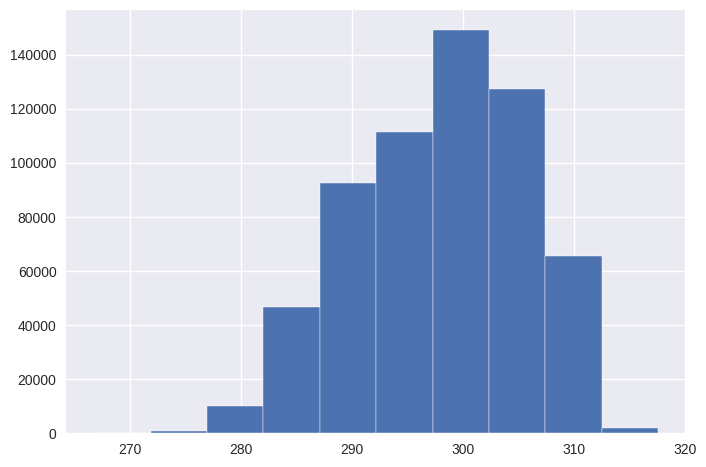

In [18]:
df['air_x'].hist()

In [39]:
# Add a year column for ease of graphing
df['year'] = [dt.year for dt in df['date']]

In [48]:
# a decade column for ease of graphing
df['decade'] = [round(dt, -1) for dt in df['year']]

<Axes: xlabel='decade', ylabel='air_x'>

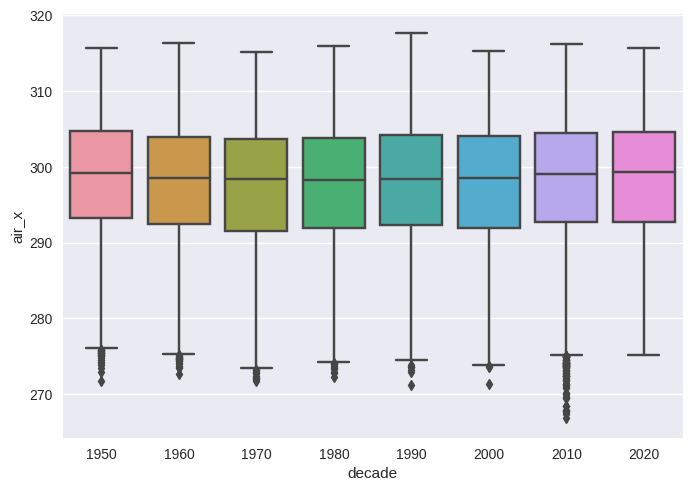

In [52]:
sns.boxplot(data=df, x="decade", y="air_x")

<Axes: >

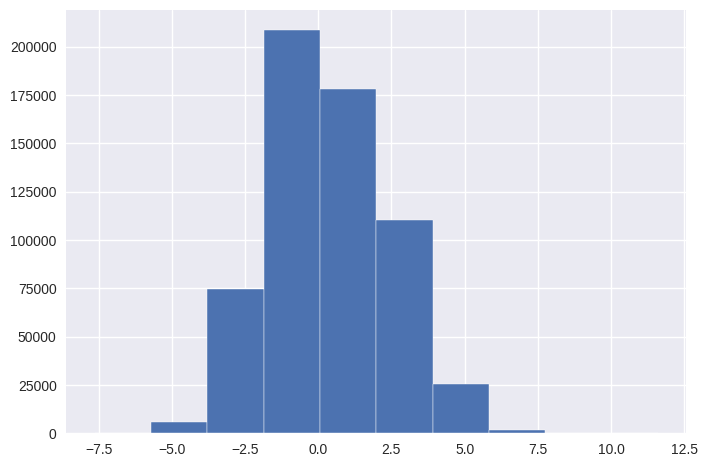

In [19]:
df['uwnd_y'].hist()

---

---

In [ ]:
df = pd.read_csv(DATA_PATH + "atmospheric-co2.csv")

In [ ]:
print(df.shape)
df.describe().T

(720, 7)


,count,mean,std,min,25%,50%,75%,max
Year,720.0,1987.500000,17.330141,1958.0000,1972.7500,1987.5000,2002.250000,2017.0000
Month,720.0,6.500000,3.454452,1.0000,3.7500,6.5000,9.250000,12.0000
Decimal Date,720.0,1987.997492,17.332539,1958.0411,1973.0199,1987.9986,2002.977425,2017.9562
Carbon Dioxide (ppm),703.0,352.375633,26.241884,313.2100,328.5550,349.8000,373.195000,407.6500
Seasonally Adjusted CO2 (ppm),703.0,352.375206,26.171620,314.4200,329.0100,349.8200,372.935000,406.0400
Carbon Dioxide Fit (ppm),707.0,352.054074,26.241431,312.4500,328.3400,349.3700,372.840000,407.2800
Seasonally Adjusted CO2 Fit (ppm),707.0,352.049830,26.178904,314.8900,328.4000,349.2700,372.605000,405.8300


In [ ]:
df.info()
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               720 non-null    int64  
 1   Month                              720 non-null    int64  
 2   Decimal Date                       720 non-null    float64
 3   Carbon Dioxide (ppm)               703 non-null    float64
 4   Seasonally Adjusted CO2 (ppm)      703 non-null    float64
 5   Carbon Dioxide Fit (ppm)           707 non-null    float64
 6   Seasonally Adjusted CO2 Fit (ppm)  707 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 39.5 KB


,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
717,2017,10,2017.7890,NaN,NaN,NaN,NaN
718,2017,11,2017.8740,NaN,NaN,NaN,NaN
719,2017,12,2017.9562,NaN,NaN,NaN,NaN


In [ ]:
# set types
df['Year'] = df['Year'].astype(dtype='int32')
df['Month'] = df['Month'].astype(dtype='int32')

In [ ]:
df['date'] = df.apply(lambda x: pd.to_datetime(f'{x.Month}/01/{x.Year}').date(), axis=1)

In [ ]:
# Truncate by date
df = df[df['date'] >= START_DATE]
df = df[df['date'] <= END_DATE]

In [ ]:
df.rename(columns={'Carbon Dioxide (ppm)':'co2', 'Seasonally Adjusted CO2 (ppm)':'co2_seas'},inplace=True)

In [ ]:
df['co2'] = df.co2.interpolate()
df['co2_seas'] = df.co2_seas.interpolate()

In [ ]:
COLS = ['co2',	'co2_seas']

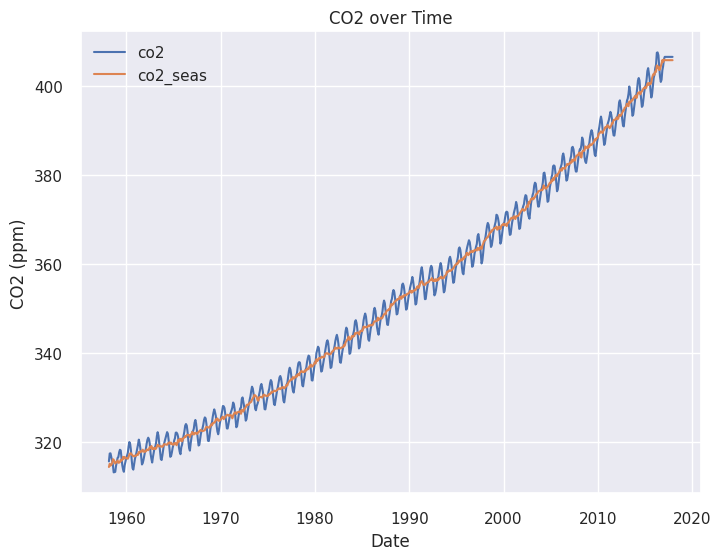

In [ ]:
plt.rcParams["figure.figsize"] = [8,6]
plt.plot(df['date'], df[COLS])
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.title('CO2 over Time')
plt.legend(COLS)
plt.show()

---

---

In [6]:
df = pd.read_csv(DATA_PATH + 'greenhouse_gas_inventory_data.csv')

In [7]:
print(df.shape)
df.describe().T

(8406, 4)


,count,mean,std,min,25%,50%,75%,max
year,8406.0,2002.188437,7.151605,1990.000000,1996.000000,2002.000000,2008.000000,2.014000e+03
value,8406.0,205547.191371,804150.377036,0.000001,297.698022,7840.318326,65898.849435,7.422208e+06


In [8]:
df.info()
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  8406 non-null   object 
 1   year             8406 non-null   int64  
 2   value            8406 non-null   float64
 3   category         8406 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 262.8+ KB


,country_or_area,year,value,category
8403,United States of America,1992,574.414624,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8404,United States of America,1991,566.900968,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8405,United States of America,1990,293.205663,unspecified_mix_of_hydrofluorocarbons_hfcs_and...


In [9]:
# Unique vals
df['category'].value_counts()

carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent     1074
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent    1074
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent            1074
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent      1074
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent                                                    1032
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent                                                      975
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent                    949
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent                                                        831
nitrogen_trifluoride_nf3_emissions_in_kilotonne_

In [10]:
df['date'] = df.apply(lambda x: pd.to_datetime(f"06/01/{x.year}").date(), axis=1)

In [12]:
# Truncate by date
df = df[df['date'] >= START_DATE]
df = df[df['date'] <= END_DATE]

---

---

In [82]:
df = pd.read_csv(DATA_PATH + 'sunspotnumber.csv')

In [83]:
print(df.shape)
df.describe().T

(315, 10)


,count,mean,std,min,25%,50%,75%,max
year,315.0,1857.00000,91.076891,1700.0,1778.5,1857.0,1935.5,2014.0
suns_spot_number,315.0,49.68381,40.239754,0.0,16.0,40.0,69.6,190.2
Unnamed: 2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()
df.tail(3)

In [84]:
df['date'] = df.apply(lambda x: pd.to_datetime(f"06/01/{int(x.year)}").date(), axis=1)

In [85]:
# Truncate by date
df = df[df['date'] >= START_DATE]
df = df[df['date'] <= END_DATE]
df.reset_index(inplace=True)

In [86]:
# a decade column for ease of graphing
df['decade'] = [round(dt.year, -1) for dt in df['date']]

<Axes: xlabel='decade', ylabel='suns_spot_number'>

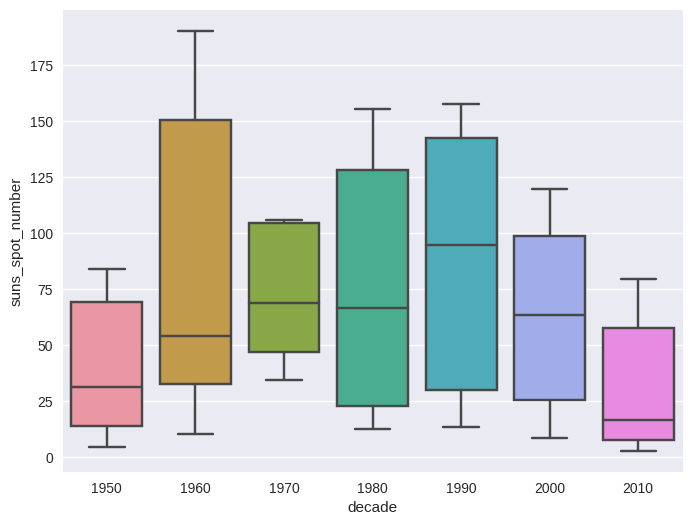

In [87]:
sns.boxplot(data=df, x="decade", y="suns_spot_number")

In [79]:
plt.rcParams["figure.figsize"] = [8,6]
plt.plot(df['date'], df['suns_spot_number'])
plt.xlabel('Date')
plt.ylabel('Sun Spots')
plt.title('Temps')
plt.legend('suns_spot_number')
plt.show()

KeyError: ignored

<Axes: >

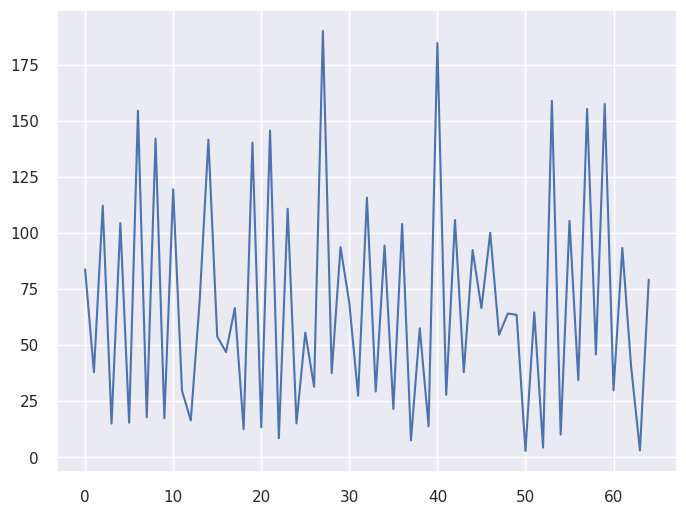

In [ ]:
df['suns_spot_number'].plot()

<Axes: >

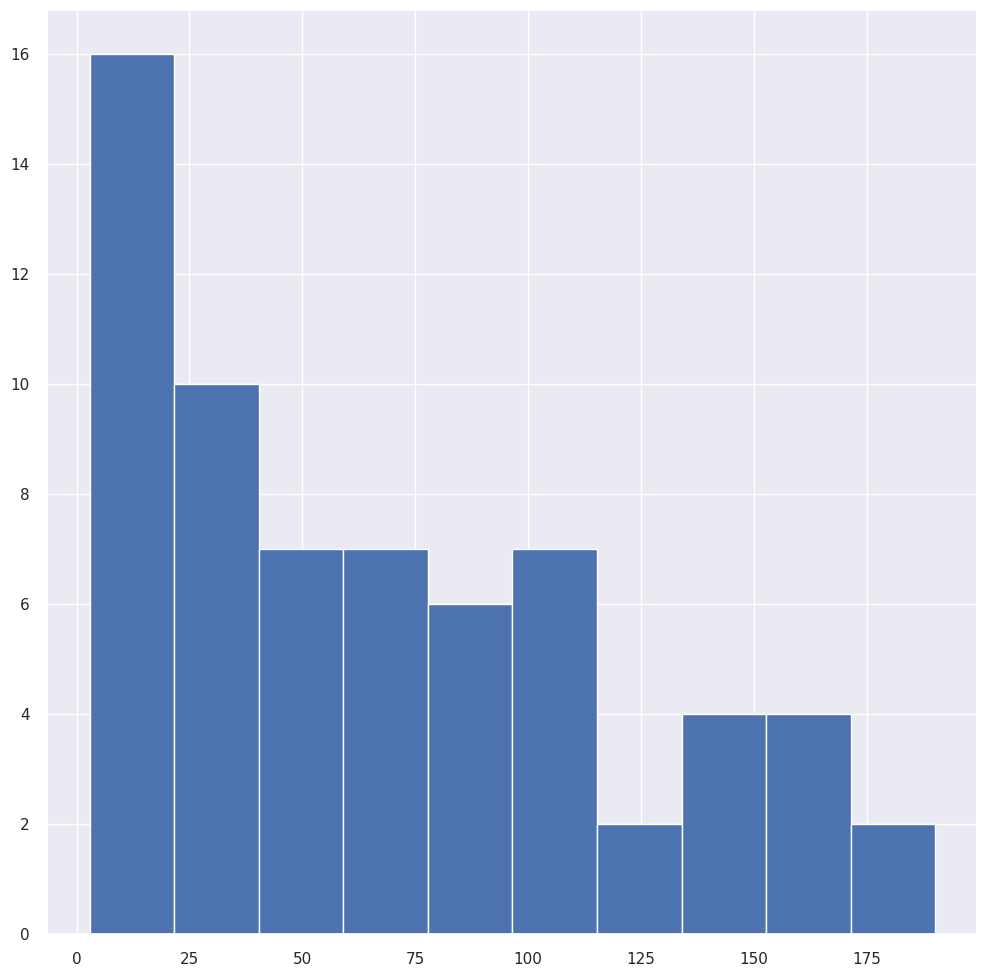

In [ ]:
df['suns_spot_number'].hist()

---

---

In [ ]:
df = pd.read_csv(DATA_PATH + 'eruptions.csv')

In [ ]:
print(df.shape)
df.describe().T

(11178, 15)


,count,mean,std,min,25%,50%,75%,max
volcano_number,11178.0,300284.371176,52321.193203,210010.00,263310.000,290050.000,343030.000,600000.000
eruption_number,11178.0,15666.905439,3297.612433,10001.00,12817.250,15650.500,18463.750,22355.000
vei,8272.0,1.947897,1.161098,0.00,1.000,2.000,2.000,7.000
start_year,11177.0,622.848260,2482.174317,-11345.00,680.000,1847.000,1950.000,2020.000
start_month,10985.0,3.450888,4.071419,0.00,0.000,1.000,7.000,12.000
start_day,10982.0,7.015025,9.645386,0.00,0.000,0.000,15.000,31.000
end_year,4332.0,1917.326639,157.646408,-475.00,1895.000,1957.000,1992.000,2020.000
end_month,4329.0,6.220836,3.686128,0.00,3.000,6.000,9.000,12.000
end_day,4326.0,13.315996,9.831282,0.00,4.000,15.000,21.000,31.000
latitude,11178.0,16.865778,30.761752,-77.53,-6.102,17.600,40.821,85.608


In [ ]:
df.info()
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          11178 non-null  int64  
 1   volcano_name            11178 non-null  object 
 2   eruption_number         11178 non-null  int64  
 3   eruption_category       11178 non-null  object 
 4   area_of_activity        4694 non-null   object 
 5   vei                     8272 non-null   float64
 6   start_year              11177 non-null  float64
 7   start_month             10985 non-null  float64
 8   start_day               10982 non-null  float64
 9   evidence_method_dating  9898 non-null   object 
 10  end_year                4332 non-null   float64
 11  end_month               4329 non-null   float64
 12  end_day                 4326 non-null   float64
 13  latitude                11178 non-null  float64
 14  longitude               11178 non-null

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
11175,357121,Quetrupillan,22351,Confirmed Eruption,NaN,3.0,-10658.0,NaN,NaN,Radiocarbon (corrected),NaN,NaN,NaN,-39.496,-71.722
11176,357121,Quetrupillan,22352,Confirmed Eruption,NaN,3.0,-11345.0,NaN,NaN,Radiocarbon (corrected),NaN,NaN,NaN,-39.496,-71.722
11177,390090,Saunders,21099,Confirmed Eruption,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-57.800,-26.483


In [ ]:
# drop rows w/empty vals
df.dropna(subset=['start_year'], inplace=True)

In [ ]:
# fill rows w/empty vals
df['start_month'].fillna(value=6,inplace=True)
df['start_day'].fillna(value=1,inplace=True)
df['vei'].fillna(value=1,inplace=True)

In [ ]:
df['start_year'] < 1800

0        False
1        False
2        False
3        False
4        False
         ...  
11172     True
11173     True
11174     True
11175     True
11176     True
Name: start_year, Length: 11177, dtype: bool

In [ ]:
# drop years out of range
df.drop(index=df[df['start_year'] < 1800].index, inplace=True)

In [ ]:
# fix months < 0
df.loc[df['start_month'] < 1,'start_month'] = 1

In [ ]:
# fix days < 0
df.loc[df['start_day'] < 1,'start_day'] = 1

In [ ]:
# set types
df['start_year'] = df['start_year'].astype(dtype='int32')
df['start_day'] = df['start_day'].astype(dtype='int32')
df['start_month'] = df['start_month'].astype(dtype='int32')

In [ ]:
df.isna()

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False
6217,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False
6218,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
6219,False,False,False,False,True,False,False,False,False,True,True,True,True,False,False


In [ ]:
df['date'] = df.apply(lambda x: pd.to_datetime(f"{int(x.start_month)}/{int(x.start_day)}/{int(x.start_year)}").date(), axis=1)

In [ ]:
df['date'].value_counts()

1852-01-01    21
1927-01-01    16
1830-01-01    15
1850-01-01    15
1825-01-01    14
              ..
1976-01-02     1
1976-01-01     1
1975-12-20     1
1975-12-11     1
1953-12-16     1
Name: date, Length: 4726, dtype: int64

In [ ]:
# Truncate by date
df = df[df['date'] >= START_DATE]
df = df[df['date'] <= END_DATE]
df.reset_index(inplace=True)

In [ ]:
vc= df['date'].value_counts()

In [ ]:
vc

1959-07-02    9
1957-07-02    8
1960-07-02    7
1970-07-02    7
1952-07-02    6
             ..
1997-06-03    1
1997-06-02    1
1997-05-19    1
1997-05-11    1
1950-01-10    1
Name: date, Length: 2505, dtype: int64

<Axes: xlabel='start_year', ylabel='count'>

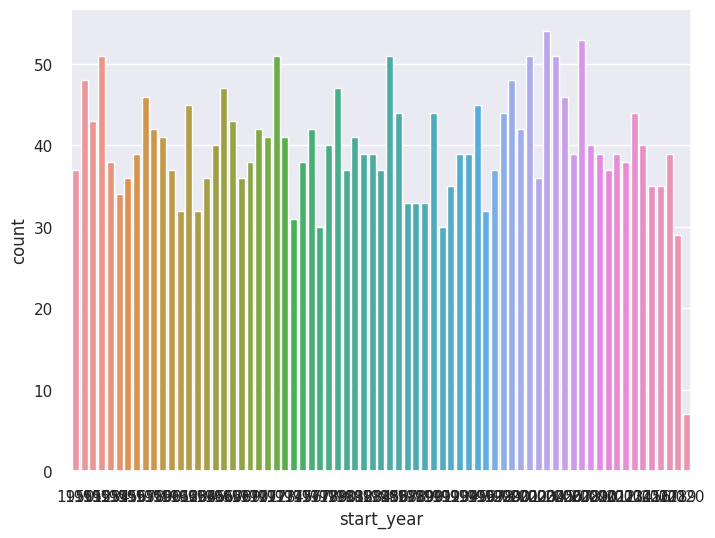

In [ ]:
sns.countplot(df, x="start_year", orient="h")


---

---

In [67]:
df = pd.read_csv(DATA_PATH + 'seaice.csv')

In [68]:
print(df.shape)
df.describe().T

(26354, 7)


,count,mean,std,min,25%,50%,75%,max
Year,26354.0,2000.591941,10.896821,1978.00,1992.000,2001.000,2010.000,2019.000
Month,26354.0,6.507399,3.451938,1.00,4.000,7.000,10.000,12.000
Day,26354.0,15.740685,8.801607,1.00,8.000,16.000,23.000,31.000
Extent,26354.0,11.494986,4.611734,2.08,7.601,12.217,15.114,20.201
Missing,26354.0,0.000003,0.000227,0.00,0.000,0.000,0.000,0.024


In [69]:
df.info()
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26354 entries, 0 to 26353
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          26354 non-null  int64  
 1    Month        26354 non-null  int64  
 2    Day          26354 non-null  int64  
 3        Extent   26354 non-null  float64
 4       Missing   26354 non-null  float64
 5    Source Data  26354 non-null  object 
 6   hemisphere    26354 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.4+ MB


,Year,Month,Day,Extent,Missing,Source Data,hemisphere
26351,2019,5,29,10.219,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26352,2019,5,30,10.363,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26353,2019,5,31,10.436,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south


In [70]:
# Rename columns
df.rename(columns={' Month':'month','Year':'year',' Day':'day'},inplace=True)
df.rename(columns={'     Extent':'extent','    Missing':'missing'},inplace=True)

In [71]:
df.isna()

,year,month,day,extent,missing,Source Data,hemisphere
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
26349,False,False,False,False,False,False,False
26350,False,False,False,False,False,False,False
26351,False,False,False,False,False,False,False
26352,False,False,False,False,False,False,False


In [72]:
df['date'] = df.apply(lambda x: pd.to_datetime(f"{x.month}/{x.day}/{x.year}").date(), axis=1)

In [73]:
df['date'].value_counts()

1978-10-26    2
2007-05-27    2
2007-05-17    2
2007-05-18    2
2007-05-19    2
             ..
1995-05-16    2
1995-05-17    2
1995-05-18    2
1995-05-19    2
2019-05-31    2
Name: date, Length: 13177, dtype: int64

In [74]:
# a decade column for ease of graphing
df['decade'] = [round(dt.year, -1) for dt in df['date']]

<Axes: xlabel='decade', ylabel='extent'>

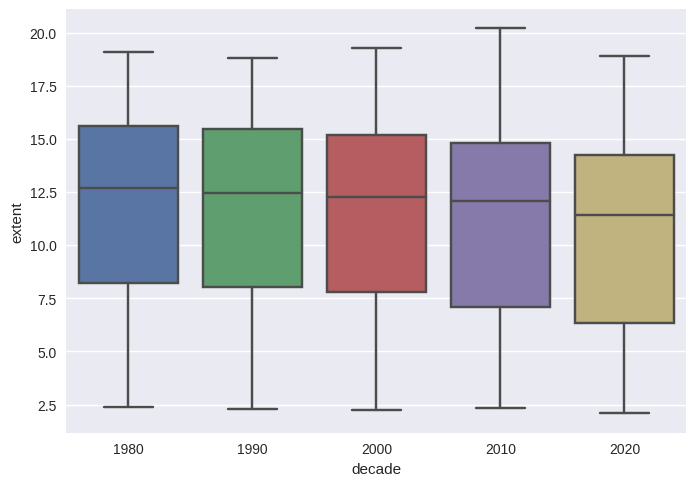

In [75]:
sns.boxplot(data=df, x="decade", y="extent")

In [ ]:
# Truncate by date
df = df[df['date'] >= START_DATE]
df = df[df['date'] <= END_DATE]
df.reset_index(inplace=True)

<Axes: >

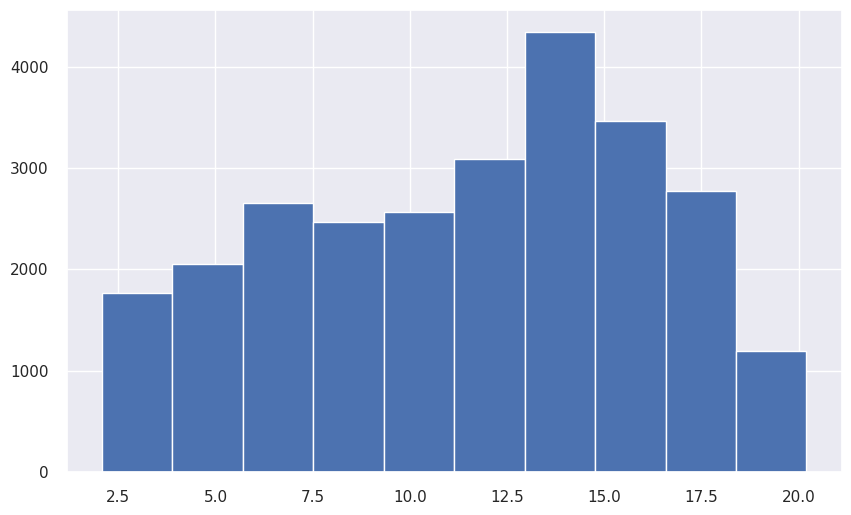

In [ ]:
df['extent'].hist()

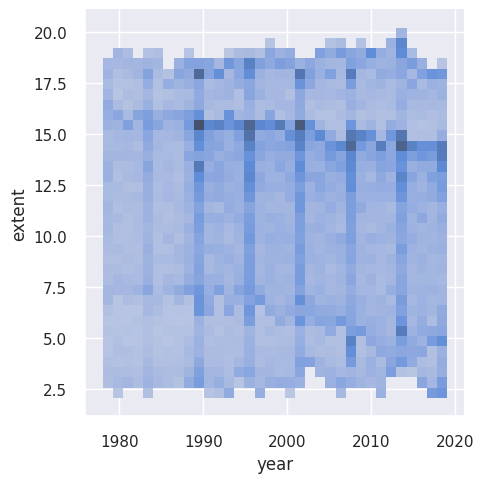

In [ ]:
sns.displot(df, x="year", y="extent")

---

---

In [ ]:
df = pd.read_csv(DATA_PATH + 'WorldForestCover.csv')

In [ ]:
print(df.shape)
df.describe().T

(860, 5)


,count,mean,std,min,25%,50%,75%,max
Year,860.0,2005.000000,11.186846,1990.0,1997.5000,2005.00,2012.5000,2020.00
TotalArea,860.0,60289.697163,175284.131896,0.2,1023.0000,9408.00,45286.0000,1637841.00
CoverArea,860.0,19255.388372,75375.208886,0.0,139.5000,2025.50,9519.5000,815312.00
PctCover,860.0,34.571802,24.943118,0.0,12.3275,33.27,52.0475,98.58


In [ ]:
df.info()
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       860 non-null    int64  
 1   Country    860 non-null    object 
 2   TotalArea  860 non-null    float64
 3   CoverArea  860 non-null    int64  
 4   PctCover   860 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.7+ KB


,Year,Country,TotalArea,CoverArea,PctCover
857,2020,Yemen,55500.0,549,0.99
858,2020,Zambia,74339.8,44814,60.28
859,2020,Zimbabwe,38684.7,17445,45.10


In [ ]:
# Unique values
df['Country'].value_counts()

Afghanistan        4
Niger              4
Niue               4
North Korea        4
North Macedonia    4
                  ..
Guam               4
Guatemala          4
Guinea             4
Guinea-Bissau      4
Zimbabwe           4
Name: Country, Length: 215, dtype: int64

In [ ]:
df['date'] = df.apply(lambda x: pd.to_datetime(f"06/01/{x.Year}").date(), axis=1)

In [ ]:
vz = df.groupby('Year').mean()

In [ ]:
vz

,TotalArea,CoverArea,PctCover
Year,,,
1990,60289.697163,19704.232558,35.198512
2000,60289.697163,19339.665116,34.736233
2010,60289.697163,19099.009302,34.396326
2020,60289.697163,18878.646512,33.956140


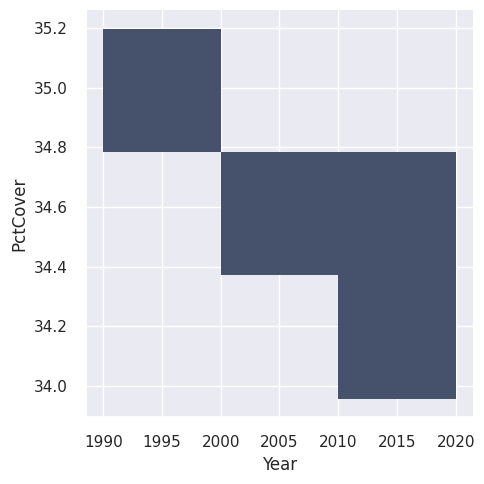

In [ ]:
sns.displot(data=vz, x="Year", y="PctCover")